In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.signal import find_peaks

Bifurcation Plot

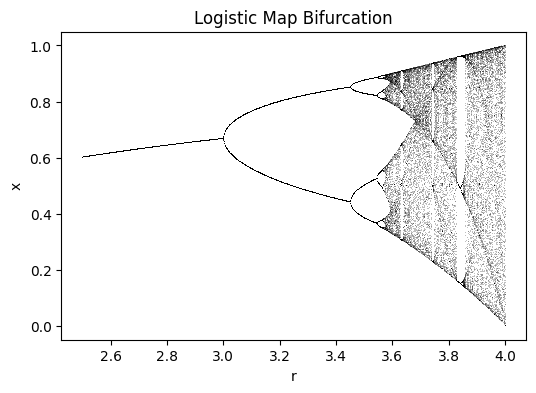

In [2]:
# Logistic map bifurcation diagram
r_values = np.linspace(2.5, 4.0, 800)
iterations = 1000
last = 100

xs = np.zeros(iterations)
points_r = []
points_x = []
for r in r_values:
    x = 0.5
    for i in range(iterations):
        x = r * x * (1 - x)
        if i >= (iterations - last):
            points_r.append(r)
            points_x.append(x)

plt.figure(figsize=(6, 4))
plt.plot(points_r, points_x, ",k", alpha=0.25)
plt.title("Logistic Map Bifurcation")
plt.xlabel("r")
plt.ylabel("x")
plt.show()

Linear Piecewise Mackey-Glass Approximation

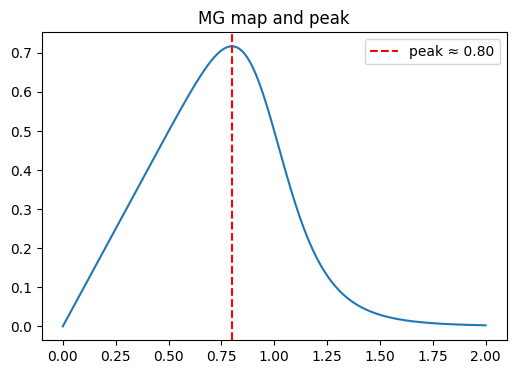

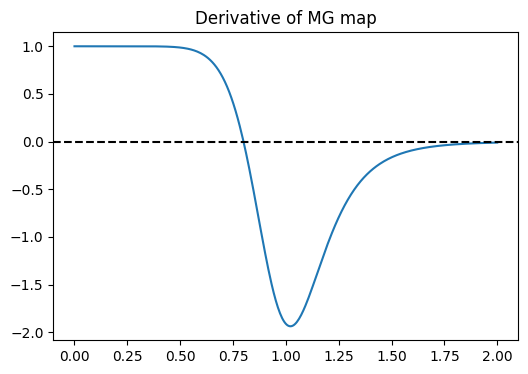

In [3]:
# Mackey-Glass inspired map
x = sp.symbols("x")
a, c = 1, 9.65
mg = a * x / (1 + x**c)
dmg = sp.diff(mg, x)
peak = sp.solve(sp.Eq(dmg, 0), x)[0]

mg_func = sp.lambdify(x, mg, "numpy")
dmg_func = sp.lambdify(x, dmg, "numpy")
xs = np.linspace(0, 2, 400)
plt.figure(figsize=(6, 4))
plt.plot(xs, mg_func(xs))
plt.axvline(float(peak), color="r", linestyle="--", label=f"peak ≈ {float(peak):.2f}")
plt.legend()
plt.title("MG map and peak")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(xs, dmg_func(xs))
plt.axhline(0, color="k", linestyle="--")
plt.title("Derivative of MG map")
plt.show()

Autocorrelation and Power Spectra

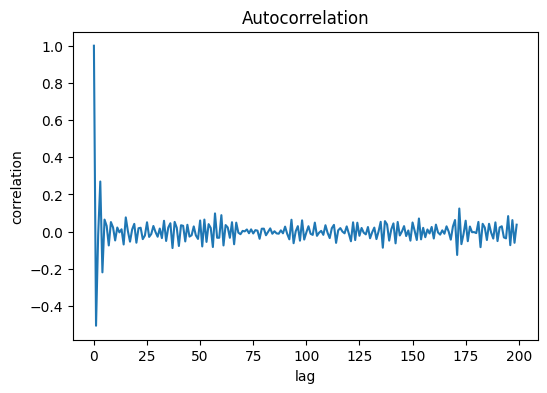

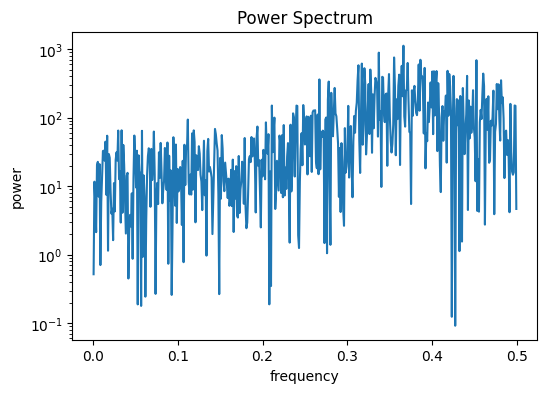

In [4]:
# generate a time series using logistic map at r=3.9
r = 3.9
N = 1000
x = np.empty(N)
x[0] = 0.5
for i in range(1, N):
    x[i] = r * x[i - 1] * (1 - x[i - 1])

# autocorrelation
mean = np.mean(x)
var = np.var(x)
MAX_LAG = min(200, N)  # maximum lag for autocorrelation
correlation = [
    np.sum((x[: N - l] - mean) * (x[l:] - mean)) / ((N - l) * var)
    for l in range(MAX_LAG)
]
plt.figure(figsize=(6, 4))
plt.plot(correlation)
plt.title("Autocorrelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

# power spectrum
fft_vals = np.fft.rfft(x - mean)
power = np.abs(fft_vals) ** 2
freqs = np.fft.rfftfreq(N, d=1)
plt.figure(figsize=(6, 4))
FREQ_PLOT_LIMIT = min(500, len(freqs))
plt.semilogy(freqs[1:FREQ_PLOT_LIMIT], power[1:FREQ_PLOT_LIMIT])
plt.title("Power Spectrum")
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

Bifurcation Diagram Functionality

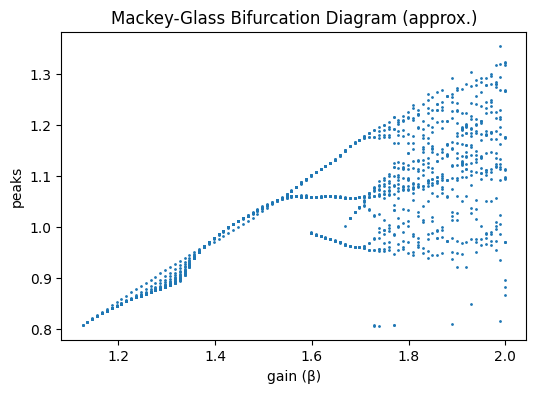

In [5]:
def mg(tau, beta, gamma=1, n=9.65, dt=0.1, T=100):
    delay_steps = int(tau / dt)
    history = np.full(delay_steps + 1, 0.5)
    x = 0.5
    xs = []
    for _ in range(int(T / dt)):
        x_tau = history[0]
        dx = beta * x_tau / (1 + x_tau**n) - gamma * x
        x = x + dx * dt
        history = np.append(history[1:], x)
        xs.append(x)
    t = np.linspace(0, T, len(xs))
    return t, np.array(xs)


def peaks(series):
    idx, _ = find_peaks(series)
    return series[idx]


betas = np.linspace(0, 2, 200)
data = []
for b in betas:
    t, x = mg(2, b)
    pk = peaks(x)[-20:]
    for p in pk:
        data.append((b, p))

data = np.array(data)
plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], s=1)
plt.xlabel("gain (β)")
plt.ylabel("peaks")
plt.title("Mackey-Glass Bifurcation Diagram (approx.)")
plt.show()

Lab Waveforms

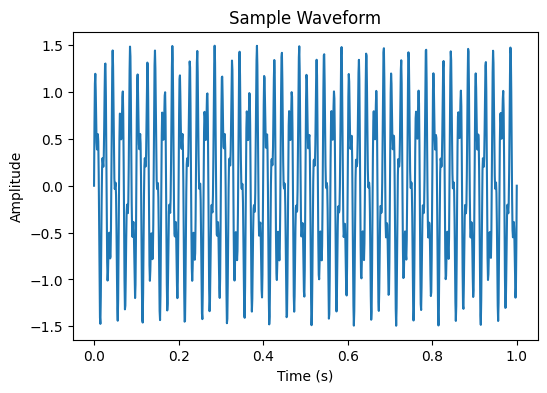

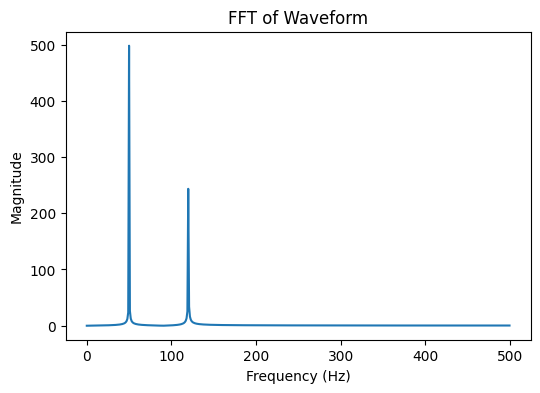

In [6]:
# synthetic waveform
t = np.linspace(0, 1, 1000)
waveform = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

plt.figure(figsize=(6, 4))
plt.plot(t, waveform)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sample Waveform")
plt.show()

# FFT
freq = np.fft.rfftfreq(len(t), d=t[1] - t[0])
fft = np.abs(np.fft.rfft(waveform))

plt.figure(figsize=(6, 4))
plt.plot(freq, fft)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of Waveform")
plt.show()